<a href="https://colab.research.google.com/github/NeuralDataMind/ds_mallikarjun/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libaries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing datasets

In [18]:
# paths of the dataset

hist_data_path = '/content/historical_data.csv'
fear_greed_data_path = '/content/fear_greed_index.csv'

In [19]:
# loading the datasets

hist_df = pd.read_csv(hist_data_path)       # historical data frame
FG_df = pd.read_csv(fear_greed_data_path)   # Fear and Greed data frame

/tmp/ipython-input-1514934020.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_df = pd.read_csv(hist_data_path)       # historical data frame


Information of the datasets

In [20]:
# Fear_Greed index

FG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [21]:
FG_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [22]:
# Historical data

hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69811 entries, 0 to 69810
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           69811 non-null  object 
 1   Coin              69811 non-null  object 
 2   Execution Price   69811 non-null  float64
 3   Size Tokens       69811 non-null  float64
 4   Size USD          69811 non-null  float64
 5   Side              69811 non-null  object 
 6   Timestamp IST     69811 non-null  object 
 7   Start Position    69811 non-null  float64
 8   Direction         69811 non-null  object 
 9   Closed PnL        69811 non-null  float64
 10  Transaction Hash  69811 non-null  object 
 11  Order ID          69811 non-null  int64  
 12  Crossed           69811 non-null  object 
 13  Fee               69810 non-null  float64
 14  Trade ID          69810 non-null  float64
 15  Timestamp         69810 non-null  float64
dtypes: float64(8), int64(1), object(7)
memor

In [23]:
hist_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Cleaning the dataset

In [24]:
# coverting date col from str to datetime
FG_df['date'] = pd.to_datetime(FG_df['date'])

# we dont need timestamps form these
FG_df = FG_df[['date', 'value', 'classification']]

print("Fear/Gread DF Cleaned:")
print(FG_df.info())


Fear/Gread DF Cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.1+ KB
None


In [25]:
# Converting the 'Timestamp' col(float) to full datetime obj
hist_df['datetime'] = pd.to_datetime(hist_df['Timestamp'], unit = 'ms')

# Creating a 'date' col
hist_df['date'] = pd.to_datetime(hist_df['datetime'].dt.date)

print("Historical DF Cleaned: ")
print(hist_df[['Timestamp', 'datetime', 'date']].head())

Historical DF Cleaned: 
      Timestamp            datetime       date
0  1.730000e+12 2024-10-27 03:33:20 2024-10-27
1  1.730000e+12 2024-10-27 03:33:20 2024-10-27
2  1.730000e+12 2024-10-27 03:33:20 2024-10-27
3  1.730000e+12 2024-10-27 03:33:20 2024-10-27
4  1.730000e+12 2024-10-27 03:33:20 2024-10-27


Merge the datasets

In [26]:
# Mereg the two dataframes on the common 'date' col
merged_df = pd.merge(hist_df, FG_df, on='date', how='left')

print("Mereged DataFrame Info\n")
merged_df.info()

Mereged DataFrame Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69811 entries, 0 to 69810
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           69811 non-null  object        
 1   Coin              69811 non-null  object        
 2   Execution Price   69811 non-null  float64       
 3   Size Tokens       69811 non-null  float64       
 4   Size USD          69811 non-null  float64       
 5   Side              69811 non-null  object        
 6   Timestamp IST     69811 non-null  object        
 7   Start Position    69811 non-null  float64       
 8   Direction         69811 non-null  object        
 9   Closed PnL        69811 non-null  float64       
 10  Transaction Hash  69811 non-null  object        
 11  Order ID          69811 non-null  int64         
 12  Crossed           69811 non-null  object        
 13  Fee               69810 non-null  float64       
 14

In [27]:
# Checking for NaN and Null values

null_sentiments = merged_df['classification'].isnull().sum()
total_trades = len(merged_df)

print(f"\nTotal trades in merged_df: {total_trades}")
print(f"Trades without sentiment data (nulls): {null_sentiments}")


Total trades in merged_df: 69811
Trades without sentiment data (nulls): 11694


- Observation: 26961 trades happened on dates that were not in FG_df.
- Action: Drop this 26961 rows of data

Handle the Null Values

In [28]:
# Before shape
print(f"Shape befor dropping nulls: {merged_df.shape}")

# Drop NaN
merged_df.dropna(subset=['classification'], inplace=True)

# After Shape
print(f"Shape after dropping nulls: {merged_df.shape}")


Shape befor dropping nulls: (69811, 20)
Shape after dropping nulls: (58117, 20)


In [29]:
# Verifiy no more nulls in the col
print(f"Nulls in 'classification' after drop: {merged_df['classification'].isnull().sum()}")

Nulls in 'classification' after drop: 0


**EDA**

In [30]:
# Unique sentiment categories
print(f"Original unique sentiment values: {merged_df['classification'].unique()}")

# Mapping
sentiment_map = {
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Neutral',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
}

merged_df['sentiment'] = merged_df['classification'].map(sentiment_map)

print(f"New unique sentiment values: {merged_df['sentiment'].unique()}")
print(merged_df['sentiment'].value_counts())

Original unique sentiment values: ['Greed' 'Fear' 'Extreme Greed' 'Neutral']
New unique sentiment values: ['Greed' 'Fear' 'Neutral']
sentiment
Fear       40859
Greed      14051
Neutral     3207
Name: count, dtype: int64


Visualization: Trades per Sentiment

/tmp/ipython-input-3803795635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


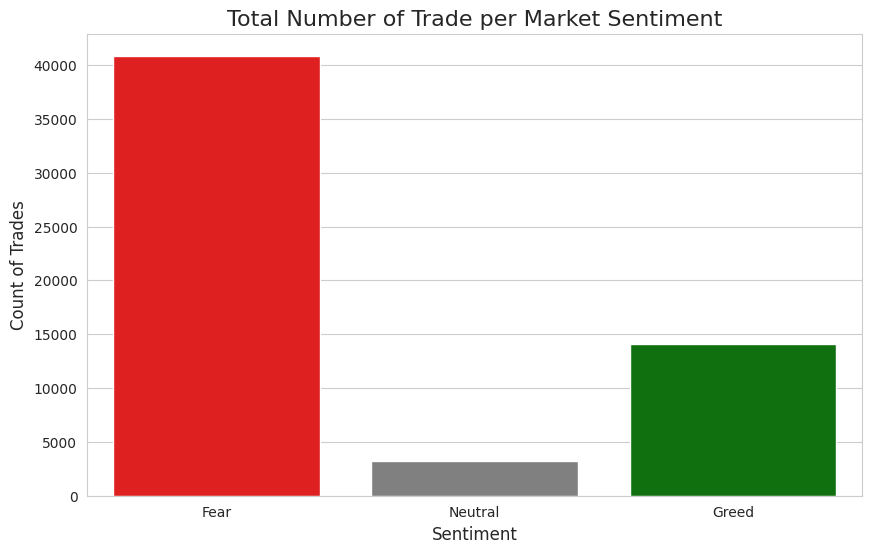

In [31]:
plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=merged_df,
    x='sentiment',
    order=['Fear', 'Neutral', 'Greed'],
    palette={'Fear': 'red', 'Neutral': 'grey', 'Greed': 'green'} # Color
)

ax.set_title('Total Number of Trade per Market Sentiment', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Count of Trades', fontsize=12)

plt.savefig('/content/outputs/trades_per_sentiment.png')

Profitability Vs Sentiment

In [32]:
sentiment_pnl = merged_df.groupby('sentiment')['Closed PnL'].agg(
    total_pnl = 'sum',
    average_pnl = 'mean'
).reset_index()

print("Profitability per Sentiment:")
print(sentiment_pnl)

Profitability per Sentiment:
  sentiment     total_pnl  average_pnl
0      Fear  4.048144e+06    99.075933
1     Greed  1.797066e+06   127.895979
2   Neutral  1.821583e+05    56.800214


/tmp/ipython-input-1880288650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


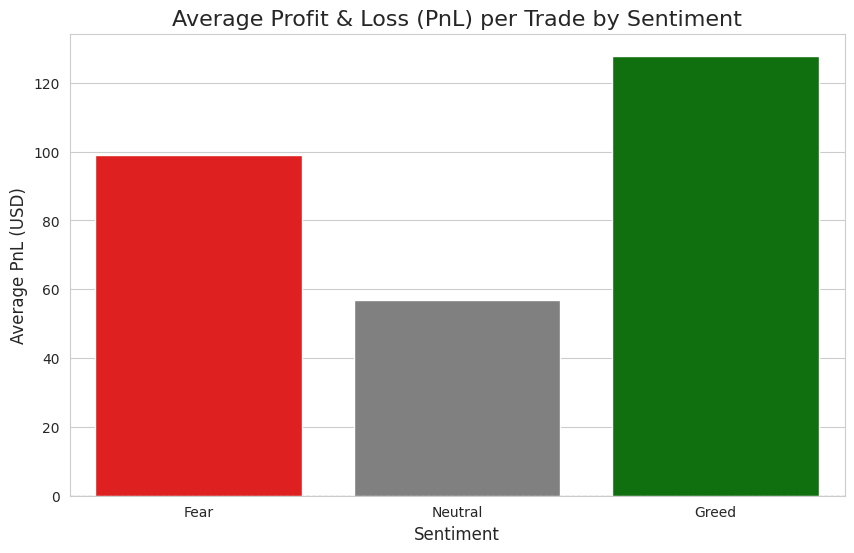

In [33]:
# Avg PnL per trade
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

ax = sns.barplot(
    data=sentiment_pnl,
    x='sentiment',
    y = 'average_pnl',
    order=['Fear', 'Neutral', 'Greed'],
    palette={'Fear': 'red', 'Neutral': 'grey', 'Greed': 'green'}
)

ax.set_title('Average Profit & Loss (PnL) per Trade by Sentiment', fontsize=16)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel('Average PnL (USD)', fontsize=12)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.savefig('/content/outputs/avg_pnl_by_sentiment.png')
plt.show()

Analyze Trading Behavior (Trade Size)


Average Trade Size per Sentiment:
  sentiment  average_trade_size
0      Fear         8885.796364
1     Greed         7144.286593
2   Neutral         5769.113530


/tmp/ipython-input-498131303.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


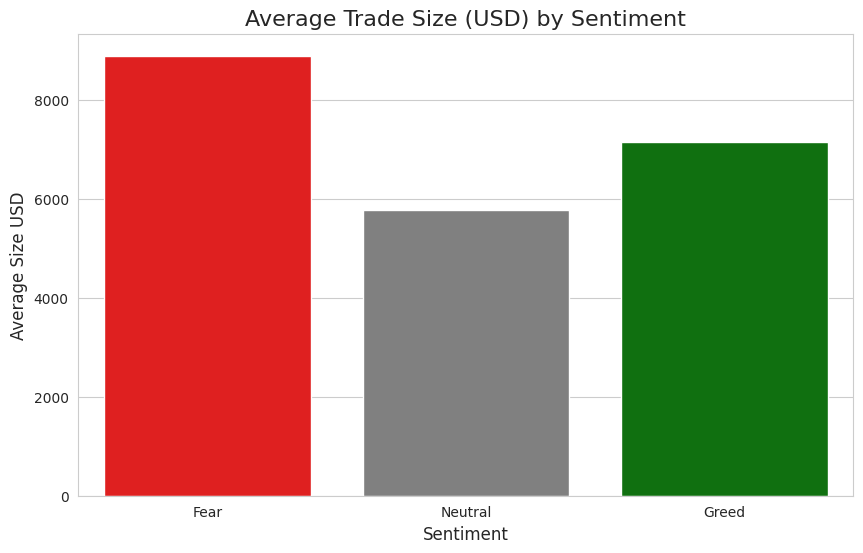

In [34]:
sentiment_size = merged_df.groupby('sentiment')['Size USD'].agg(
    average_trade_size = 'mean'
).reset_index()

print("\nAverage Trade Size per Sentiment:")
print(sentiment_size)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=sentiment_size,
    x='sentiment',
    y='average_trade_size',
    order=['Fear', 'Neutral', 'Greed'],
    palette={'Fear': 'red', 'Neutral': 'grey', 'Greed': 'green'}
)

ax.set_title('Average Trade Size (USD) by Sentiment', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Average Size USD', fontsize=12)

# Save the chart
plt.savefig('/content/outputs/average_trade_size_by_sentiment.png')
plt.show()

Analyze Trader Segments

In [35]:
# 1. Find the total PnL for each trader
trader_pnl = merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False)

# 2. Get the list of Top 10% and Bottom 10% traders
top_traders_count = int(len(trader_pnl) * 0.10)
top_traders = trader_pnl.head(top_traders_count).index
bottom_traders = trader_pnl.tail(top_traders_count).index

# 3. Create a new column to segment traders
def segment_trader(account):
    if account in top_traders:
        return 'Top 10%'
    elif account in bottom_traders:
        return 'Bottom 10%'
    else:
        return 'Middle 80%'

merged_df['trader_segment'] = merged_df['Account'].apply(segment_trader)

# 4. Check the segmentation
print(merged_df['trader_segment'].value_counts())

trader_segment
Middle 80%    43335
Top 10%       14410
Bottom 10%      372
Name: count, dtype: int64


Analyze Trading

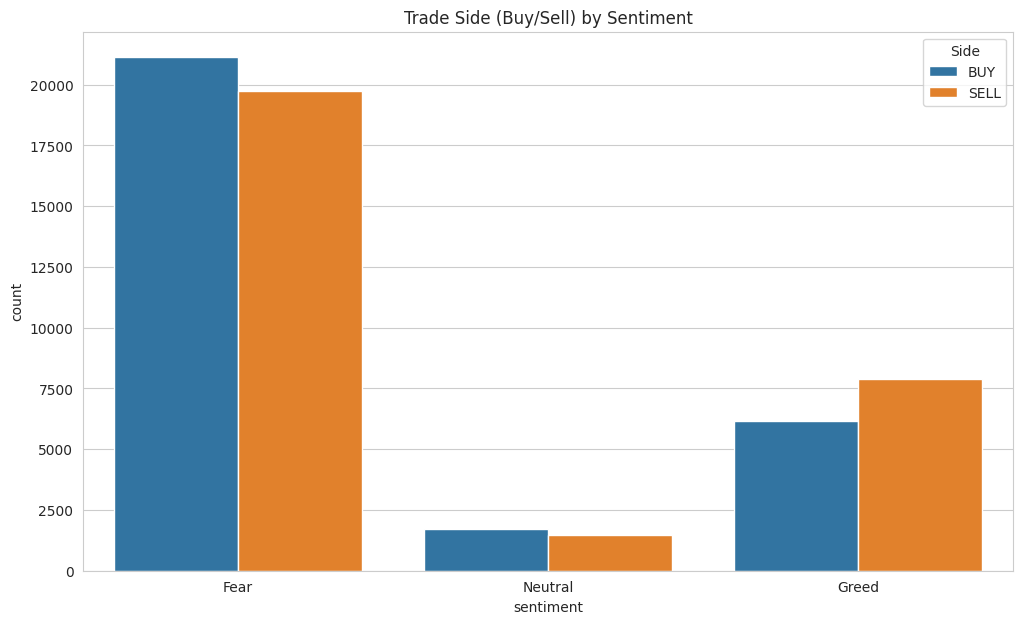

/tmp/ipython-input-4167090414.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


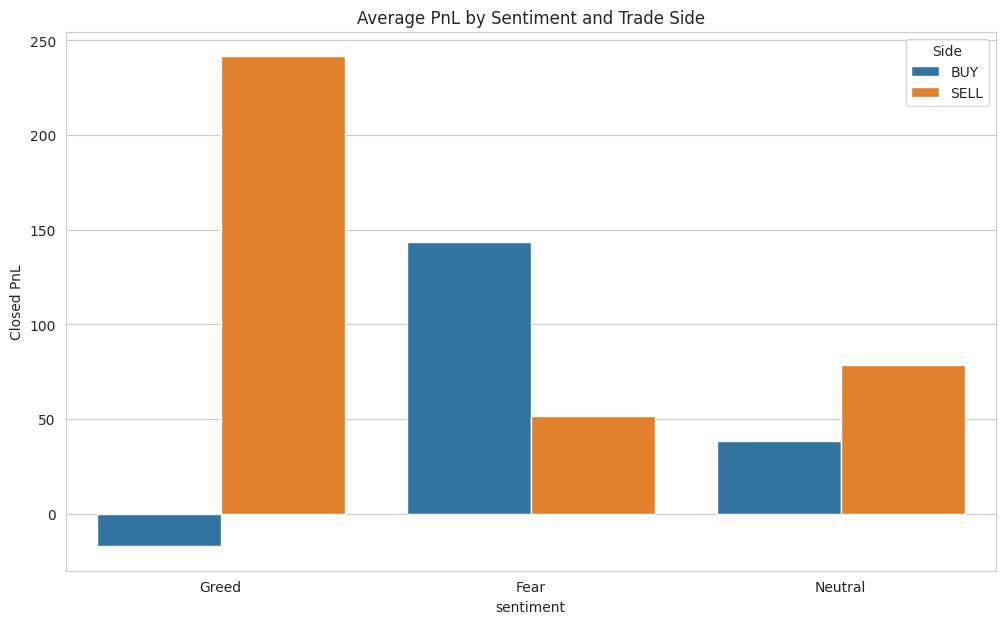

In [36]:
# 1. Plot trade side by sentiment
plt.figure(figsize=(12, 7))
sns.countplot(
    data=merged_df,
    x='sentiment',
    hue='Side', # Check if 'Buy' or 'Sell' is more common
    order=['Fear', 'Neutral', 'Greed']
)
plt.title('Trade Side (Buy/Sell) by Sentiment')
plt.savefig('/content/outputs/side_by_sentiment.png')
plt.show()

# 2. Plot most profitable side by sentiment
plt.figure(figsize=(12, 7))
sns.barplot(
    data=merged_df,
    x='sentiment',
    y='Closed PnL',
    hue='Side',
    estimator=np.mean,
    ci=None
)
plt.title('Average PnL by Sentiment and Trade Side')
plt.savefig('/content/outputs/pnl_by_side_and_sentiment.png')
plt.show()

/tmp/ipython-input-3719394572.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


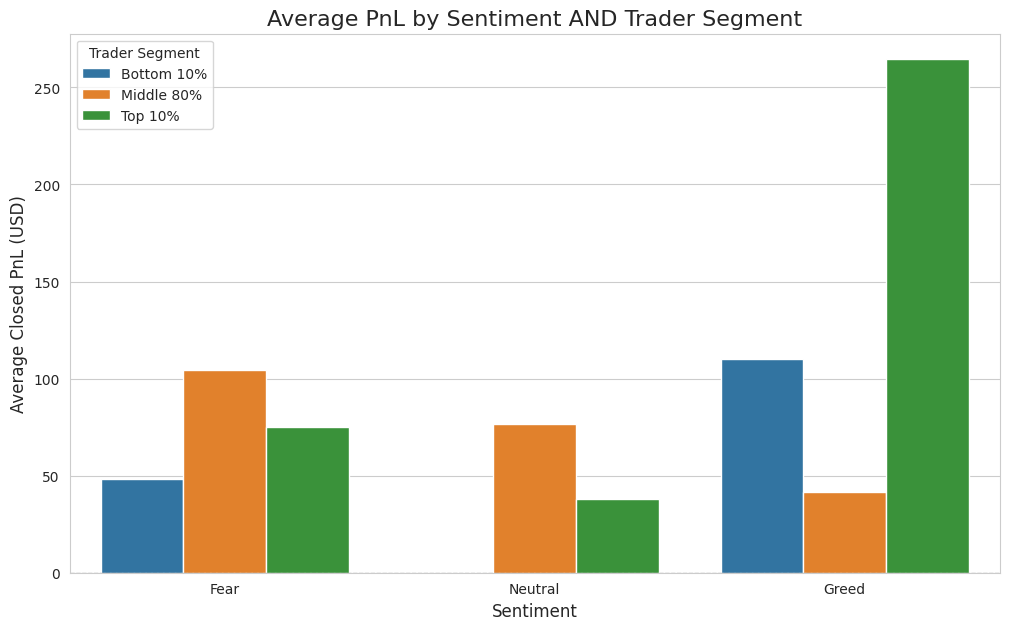

In [37]:
# This chart will show who is winning, when, and how.
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=merged_df,
    x='sentiment',
    y='Closed PnL',
    hue='trader_segment',  # Segment by trader group
    order=['Fear', 'Neutral', 'Greed'],
    estimator=np.mean,    # Calculate the average PnL
    ci=None               # Hide confidence intervals
)

ax.set_title('Average PnL by Sentiment AND Trader Segment', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Average Closed PnL (USD)', fontsize=12)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--') # Add a zero line

plt.legend(title='Trader Segment')

# Save the final chart
plt.savefig('/content/outputs/pnl_by_sentiment_and_segment.png')
plt.show()